In [2]:
import pandas as pd
import numpy as np
import datetime
import sqlite3
from pandas.tseries.holiday import USFederalHolidayCalendar as uscal

import requests
import json

import matplotlib.pyplot as plt
import seaborn as sns

#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.inspection import permutation_importance

import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR
%matplotlib inline

C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [5]:
model_prep = pd.read_csv('Zinfanel_all.csv')

In [36]:
training = model_prep[model_prep['timestamp'] < '2020-07-20 00:00:00']
testing = model_prep[model_prep['timestamp'] > '2020-12-04 00:00:00']

In [47]:
len(training), len(testing)

(1968, 3790)

### Linear Regressor 

In [37]:
# Modeling - baseline
y_train = training['interval_kWh']
X_train = training[['temp', 'pressure', 'humidity', 
                'sunlight_No', 'sunlight_Yes', 'hour']]

y_test= testing['interval_kWh']
X_test = testing[['temp', 'pressure', 'humidity', 
                'sunlight_No', 'sunlight_Yes', 'hour']]
lr = LinearRegression()
lr_mod = lr.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.3703574736008637, 0.9947161275706888)

### RFC Regressor

In [38]:
regressor = RandomForestRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.0996459428861786, 0.7846045044503076)

### XG-Boost Regressor

In [39]:
regressor = xgboost.XGBRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


(0.0923315667045795, 0.709286615656045)

### Support Vector Regressor

In [40]:
regressor = SVR()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(1.0794331471598662, 0.9351735053007452)

### Extra Tree Regressor

In [41]:
regressor = ExtraTreesRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.00030447154471997546, 0.72406988707124)

### Bagging Regressor

In [42]:
regressor = BaggingRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.10648247967479679, 0.8272518944591027)

### Gradient Boosting Regressor

In [43]:
regressor = GradientBoostingRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.2501168619053553, 0.7125142643369642)

## Further tuning & Additional Variables
**Testing models:**
- RFC
- Extra Tree

**Additional Features:**
- Season
- Temperature from the hour before
- Working day vs non-working day

### Feature Selection

In [44]:
y = model_prep['interval_kWh']
X = model_prep[['temp', 'pressure', 'humidity', 
                'sunlight_No', 'sunlight_Yes', 'hour', 'hour_before', 'workday_0', "workday_1",
               'season_Fall', 'season_Winter', 'season_Spring', 'season_Summer']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.25, random_state=123)

In [45]:
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores

,0,0
0,temp,18.131642
1,pressure,5.092782
2,humidity,10.731078
3,sunlight_No,65.708692
4,sunlight_Yes,65.708692
5,hour,6.389894
6,hour_before,18.057721
7,workday_0,2.698362
8,workday_1,2.698362
9,season_Fall,8.336044


In [59]:
training = model_prep[model_prep['timestamp'] < '2020-07-20 00:00:00']
testing = model_prep[model_prep['timestamp'] > '2020-12-04 00:00:00']

y_train = training['interval_kWh']
X_train = training[['temp', 'pressure', 'humidity', 
                'sunlight_No', 'sunlight_Yes', 'hour', 'hour_before', 'workday_0', "workday_1",
               'season_Fall', 'season_Winter', 'season_Spring', 'season_Summer']]

y_test= testing['interval_kWh']
X_test = testing[['temp', 'pressure', 'humidity', 
                'sunlight_No', 'sunlight_Yes', 'hour', 'hour_before', 'workday_0', "workday_1",
               'season_Fall', 'season_Winter', 'season_Spring', 'season_Summer']]

### RFC 

In [60]:
# More features for RFC
regressor = RandomForestRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.07645127235772357, 0.6862705730870708)

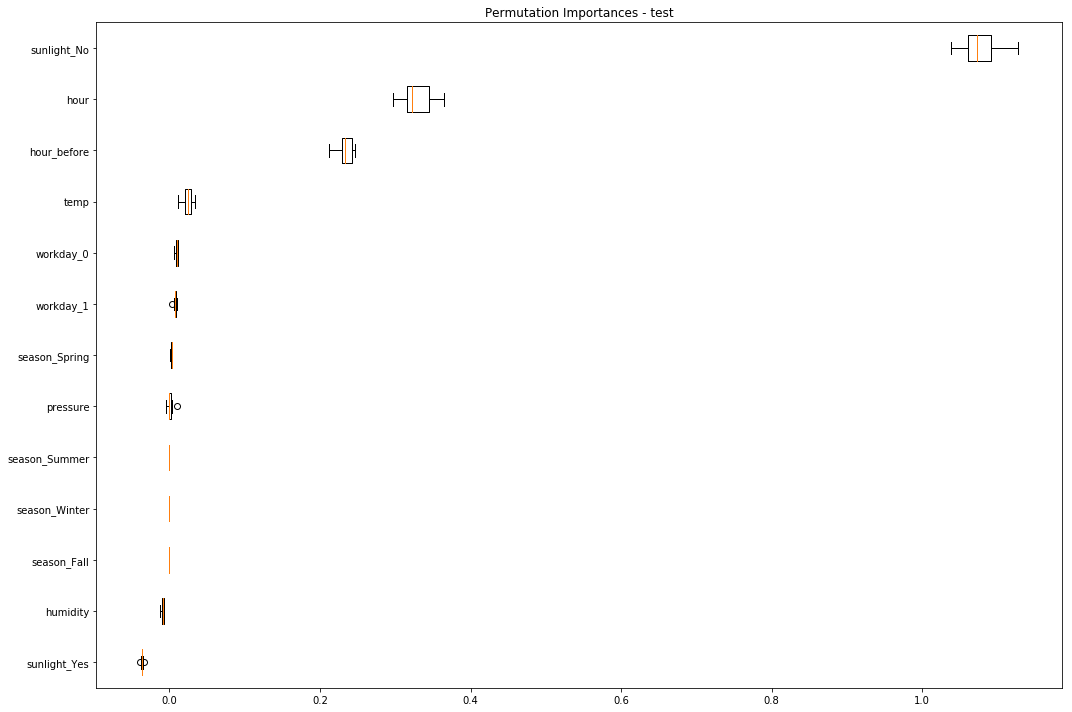

In [61]:
result = permutation_importance(regressor, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances - test")
fig.tight_layout()

### Extra Trees

In [62]:
# More features for RFC
regressor = ExtraTreesRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(4.535441579662809e-15, 0.6723644897097623)

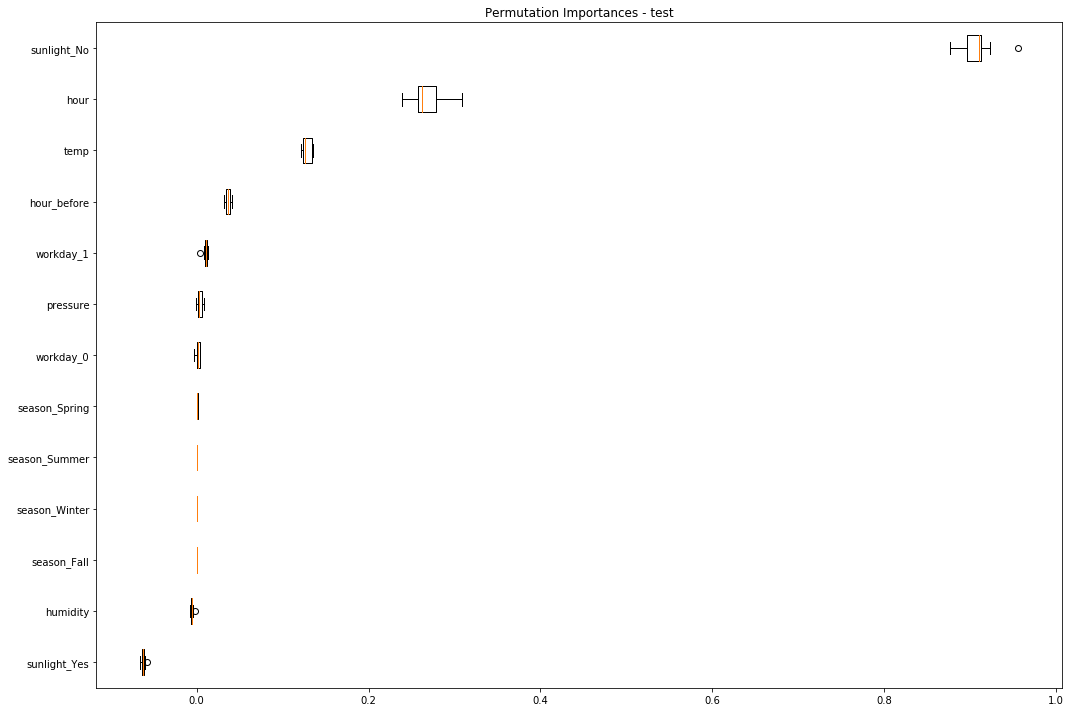

In [63]:
result = permutation_importance(regressor, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances - test")
fig.tight_layout()

### Overall:
- Extra Tree performs slightly better on testing set but with a bit of overfitting issues
- Extra Tree is performing close to perfect for training set

In [87]:
training['pred_usage'] = y_predt

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Saving calculation using extra trees

In [64]:
bills = pd.read_csv('Zinfandel electric #3.csv')
bills.columns

Index(['meter_uid', 'utility', 'utility_service_id', 'utility_billing_account',
       'utility_service_address', 'utility_meter_number',
       'utility_tariff_name', 'bill_start_date', 'bill_end_date', 'bill_days',
       'bill_statement_date', 'bill_total_kWh', 'bill_total', 'source',
       'updated', 'bill_volume', 'bill_total_unit', 'Demand_cost', 'Demand_kw',
       'supplier_1_total_cost', 'supplier_1_service_id', 'supplier_1_tariff',
       'supplier_1_total_volume', 'supplier_1_name', 'supplier_1_type',
       'supplier_1_total_unit', 'pge_details_net_generation',
       'pge_details_baseline_territory', 'pge_details_serial',
       'pge_details_consumption', 'pge_details_rotating_outage_block'],
      dtype='object')

In [65]:
bill = bills[['bill_start_date', 'bill_end_date', 'bill_days',
       'bill_total_kWh', 'bill_total', 'bill_volume',  'Demand_cost', 'Demand_kw']]

In [83]:
bill.head(10)

,bill_start_date,bill_end_date,bill_days,bill_total_kWh,bill_total,bill_volume,Demand_cost,Demand_kw
0,03/15/2021,04/14/2021,30,2868.08,704.73,2868.08,95.33,6.08
1,02/11/2021,03/15/2021,32,2970.96,690.91,2970.96,82.96,5.76
2,01/12/2021,02/11/2021,30,2831.36,680.58,2831.36,85.82,6.40
3,12/11/2020,01/12/2021,32,3061.12,713.54,3061.12,82.49,6.40
4,11/12/2020,12/11/2020,29,2801.40,654.29,2801.40,89.66,7.36
5,10/13/2020,11/12/2020,30,3249.52,835.26,3249.52,116.05,6.40
6,09/11/2020,10/13/2020,32,3368.08,955.94,3368.08,153.77,7.36
7,08/12/2020,09/11/2020,30,3256.32,915.38,3256.32,147.44,6.72
8,07/13/2020,08/12/2020,30,3286.88,935.27,3286.88,161.48,7.36
9,06/12/2020,07/13/2020,31,3561.36,992.72,3561.36,161.48,7.36


In [89]:
testing_bill3 = testing[(testing['timestamp'] > "2020-12-11 00:00:00") & (testing['timestamp'] < "2021-01-12 00:00:00")]
testing_bill2 = testing[(testing['timestamp'] > "2021-01-12 00:00:00") & (testing['timestamp'] < "2021-02-11 00:00:00")]
testing_bill1 = testing[(testing['timestamp'] > "2021-02-11 00:00:00") & (testing['timestamp'] < "2021-03-15 00:00:00")]
testing_bill0 = testing[(testing['timestamp'] > "2021-03-15 00:00:00") & (testing['timestamp'] < "2021-04-14 00:00:00")]
training_bill9 = training[(training['timestamp'] > "2020-06-12 00:00:00") & (training['timestamp'] < "2020-07-13 00:00:00")]

In [79]:
sum(testing_bill3.interval_kWh), sum(testing_bill3.pred_usage)

(3056.4799999999955, 3300.7921440000005)

In [80]:
sum(testing_bill2.interval_kWh), sum(testing_bill2.pred_usage)

(2827.1199999999994, 3128.681800000002)

In [81]:
sum(testing_bill1.interval_kWh), sum(testing_bill1.pred_usage)

(2966.800000000002, 3238.9076399999944)

In [82]:
sum(testing_bill0.interval_kWh), sum(testing_bill0.pred_usage)

(2864.2400000000025, 3026.9790799999987)

In [90]:
sum(training_bill9.interval_kWh), sum(training_bill9.pred_usage)

(3555.1199999999967, 3555.1199999999967)